<a href="https://colab.research.google.com/github/ndbellew/KompyuterM3chakrs/blob/master/Tensorflow-Keras/BasicTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow and tk.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


## Grab Dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Basic Setup

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [42]:
print(train_images.shape,len(train_labels),train_labels,test_images.shape,len(test_labels),test_labels)

(60000, 28, 28) 60000 [9 0 0 ... 3 0 5] (10000, 28, 28) 10000 [9 2 1 ... 8 1 5]


### Preprocess the Data

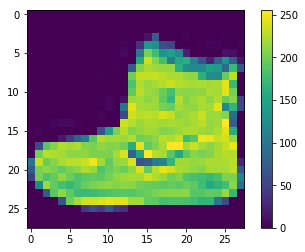

In [43]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

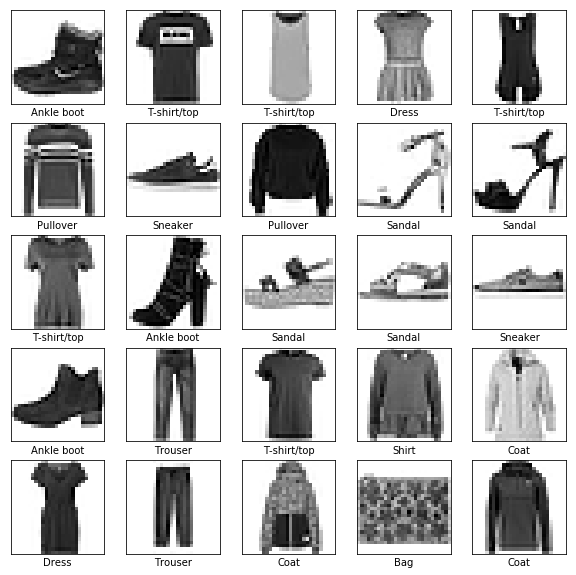

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Using The Model

### Build the Model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compile Model

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the Model


In [48]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5019 - acc: 0.8231
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3780 - acc: 0.8642
Epoch 3/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3378 - acc: 0.8768
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3151 - acc: 0.8846
Epoch 5/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2978 - acc: 0.8912
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2821 - acc: 0.8963
Epoch 7/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2707 - acc: 0.8995
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2595 - acc: 0.9043
Epoch 9/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2481 - acc: 0.9061
Epoch 10/10
60000/60000 [==============================] - 4s 63us/sample - loss: 

### Evaluate Accuracy

In [49]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.3384 - acc: 0.8826
Test accuracy: 0.8826


### Make Predictions

In [50]:
predictions = model.predict(test_images)
print(predictions[0])

for i in range(0, len(predictions)-1, 500):
  print(np.argmax(predictions[i]))
print("Or to make it more clear what this means")
for i in range(0, len(predictions)-1, 500):
  print(class_names[np.argmax(predictions[i])])

[3.4143838e-07 1.7065276e-10 2.1344711e-07 4.0862341e-10 1.2624849e-07
 3.4555080e-04 2.3039333e-07 7.1156682e-03 9.4402040e-08 9.9253768e-01]
9
2
6
3
8
2
1
0
0
4
2
7
1
2
8
5
7
2
6
8
Or to make it more clear what this means
Ankle boot
Pullover
Shirt
Dress
Bag
Pullover
Trouser
T-shirt/top
T-shirt/top
Coat
Pullover
Sneaker
Trouser
Pullover
Bag
Sandal
Sneaker
Pullover
Shirt
Bag


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

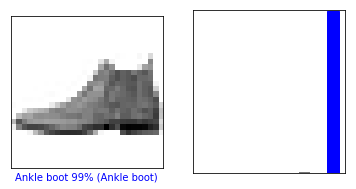

In [52]:
# this is the 0th image
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

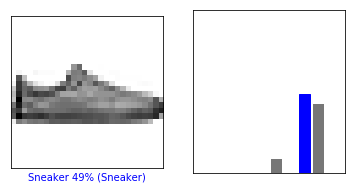

In [53]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

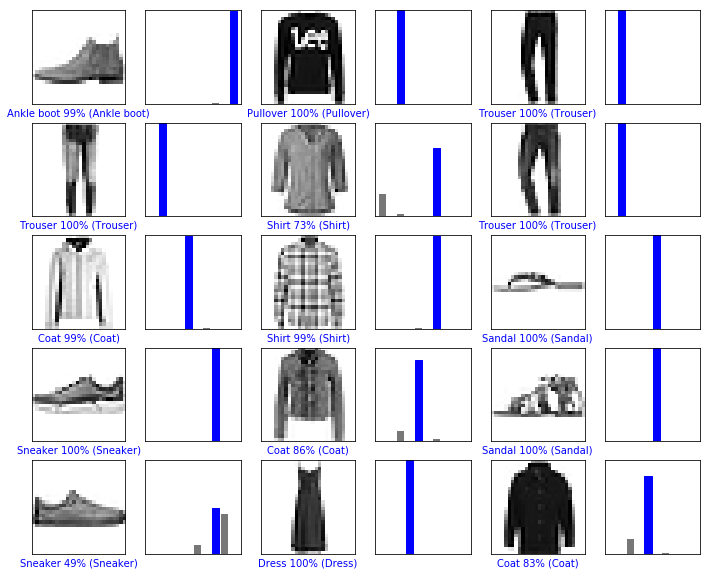

In [55]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [56]:
# Use trained model to make prediction about a single image
img = test_images[0]

print(img.shape)

(28, 28)


In [58]:
img =(np.expand_dims(img,0))# need to add img to the a list
print(img.shape)

(1, 28, 28)


In [64]:
#now predict the image
predictions_single = model.predict(img)
print(predictions_single)
print(class_names[np.argmax(predictions_single[0])])

[[3.4143935e-07 1.7065242e-10 2.1344711e-07 4.0862189e-10 1.2624862e-07
  3.4555062e-04 2.3039311e-07 7.1156714e-03 9.4402573e-08 9.9253768e-01]]
Ankle boot


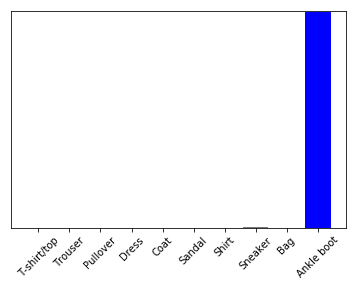

In [61]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()